# Rejilla de ocupación determinística
## Robótica Móvil
### Dr. Juan Pablo Ramírez Paredes

En este ejemplo, se detallará cómo utilizando un algoritmo de procesamiento de imágenes podemos crear un mapa con la técnica de rejilla de ocupación (determinística).

### Repaso: creación de rejilla

Suponiendo que conocemos la coordenada de un punto en el mundo, para una rejilla con celdas de lado tamaño $s$ y con $N \times N$ celdas ($N$ par) las coordenadas de la celda que contiene al punto son

$$ x_r = \frac{N}{2} + \left \lceil \frac{x}{s} \right \rceil  $$
$$ y_r = \frac{N}{2} - \left \lceil \frac{y}{s} \right \rceil + 1  $$


In [1]:
# Importamos todo lo que necesitaremos en este notebook
import matplotlib.pyplot as plt
import skimage.draw as skd # Esto es nuevo, es el módulo draw de scikit-image
import numpy as np
import math as m

def w2g(x, y, N, s):
    """ Esta función implementa las ecuaciones antes descritas """
    xr = N//2 + m.ceil(x/s)
    yr = N//2 - m.ceil(y/s) + 1
    return xr-1, yr-1 # Restamos uno porque los índices en Python inician en cero

Vamos a simular un escenario donde conocemos (a) dónde está el robot y (b) en dónde se encuentra en el mundo un obstáculo. Suponemos que el obstáculo es un punto para simular que el sensor tiene un ángulo de detección muy estrecho.

Denominaremos $(x_{obs}, y_{obs})$ a las coordenadas del obstáculo en el mundo, y $(x_{robot}, y_{robot})$ a las del robot. Entonces, nos interesa marcar las celdas que se encuentran en línea recta entre ambos puntos como *libres*. 

Construiremos una rejilla con $N=16$ celdas por lado y $s=0.25$ m de longitud por cada lado de la celda. La rejilla "grid" será una matriz de Numpy. Como vamos a graficarla como imagen, la haremos blanca para dibujar el área sin obstáculos de gris. En una imagen digital en niveles de gris, el 0 es negro y un nivel de 255 (el máximo) es blanco.

Procedamos a encontrar las coordenadas en la rejilla de ocupación del robot y del obstáculo. Las coordenadas en el mundo se generarán al azar en el intervalo $[-2, 2]$ para los dos objetos, tanto en X como en Y.

In [2]:
N = 16
s = 0.25
grid = 255*np.ones((N,N))

x_obs = 4.0*(np.random.random()-0.5)
y_obs = 4.0*(np.random.random()-0.5)

x_robot = 4.0*(np.random.random()-0.5)
y_robot = 4.0*(np.random.random()-0.5)

xr_robot, yr_robot = w2g(x_robot, y_robot, N, s)
xr_obs, yr_obs = w2g(x_obs, y_obs, N, s)

print("Coordenadas del robot ({}, {})".format(x_robot, y_robot))
print("Celda del robot en el mapa (renglon, columna) = ({}, {})".format(yr_robot, xr_robot))

print("Coordenadas del robot ({}, {})".format(x_obs, y_obs))
print("Celda del robot en el mapa (renglon, columna) = ({}, {})".format(yr_obs, xr_obs))

Coordenadas del robot (-0.09758541364903905, 1.0066331093740075)
Celda del robot en el mapa (renglon, columna) = (3, 7)
Coordenadas del robot (0.8748808686493281, 0.03734546764749025)
Celda del robot en el mapa (renglon, columna) = (7, 11)


Para dibujar una línea entre dos celdas de una matriz o imagen digital, se utiliza el [algoritmo de Bresenham](https://en.wikipedia.org/wiki/Bresenham%27s_line_algorithm). Una implementación que se incluye con Anaconda es la del paquete scikit-image en su módulo **draw**. Esta implementación regresa dos valores: una lista de Python con los renglones de los puntos por los que pasa la línea, y otra lista con las columnas.

Invocamos a continuación esta función para obtener las coordenadas de las celdas por las que pasa la línea, y hacemos que las celdas del mapa tomen el valor 128 (tono gris intermedio).

In [3]:
rr, cc = skd.line(yr_robot, xr_robot, yr_obs, xr_obs)
grid[rr, cc] = 128

Por último, graficamos todo utilizando la biblioteca Matplotlib. En azul tendremos la ubicación del obstáculo, en rojo la del robot y debemos ver que todas las celdas del mapa entre ambos objetos se dibujen en gris, representando que no hay obstáculos en esa región.

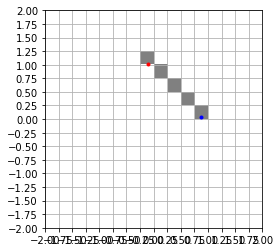

In [4]:
plt.plot(x_obs, y_obs, '.', color='b')
plt.plot(x_robot, y_robot, '.', color='r')



plt.imshow(grid, cmap='gray', vmin=0, vmax=255, extent=[-2,2,-2,2])
ax = plt.gca()
yticks = np.linspace(-2,2,17)
xticks = np.linspace(-2,2,17)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
plt.grid(True)


plt.show()